# Analysis

In this notebook, I conduct exploratory analysis. Here are questions I attempt to answer in doing so:
* Do any players' standout from the rest?
* Can can we separate the absolute best from the other top players?
* Are there any other subgroups of players that can be identified?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

from bokeh.plotting import figure, output_notebook, show, save, ColumnDataSource
from bokeh.models import HoverTool, CategoricalColorMapper
from bokeh.palettes import d3
from bokeh.transform import factor_cmap
output_notebook()

Loading BokehJS ...

In [2]:
df_male = pd.read_csv('data/male_processed.csv', index_col='player')

In [3]:
df_male

,average_rank,years_in_top10,best_rank,worst_rank,earliest_year,latest_year
player,,,,,,
Peter Nicol,2.400000,10,1,8,1996,2005
Ali Farag,3.250000,4,1,7,2016,2019
Jansher Khan,3.333333,3,1,8,1996,1998
Jonathon Power,3.666667,9,1,9,1997,2005
Mohamed El Shorbagy,3.700000,10,1,10,2010,2019
Ramy Ashour,3.909091,11,1,7,2006,2016
Grégory Gaultier,4.000000,15,1,10,2003,2018
Ahmed Barada,4.250000,4,2,7,1997,2000
Rodney Eyles,4.333333,3,2,7,1996,1998


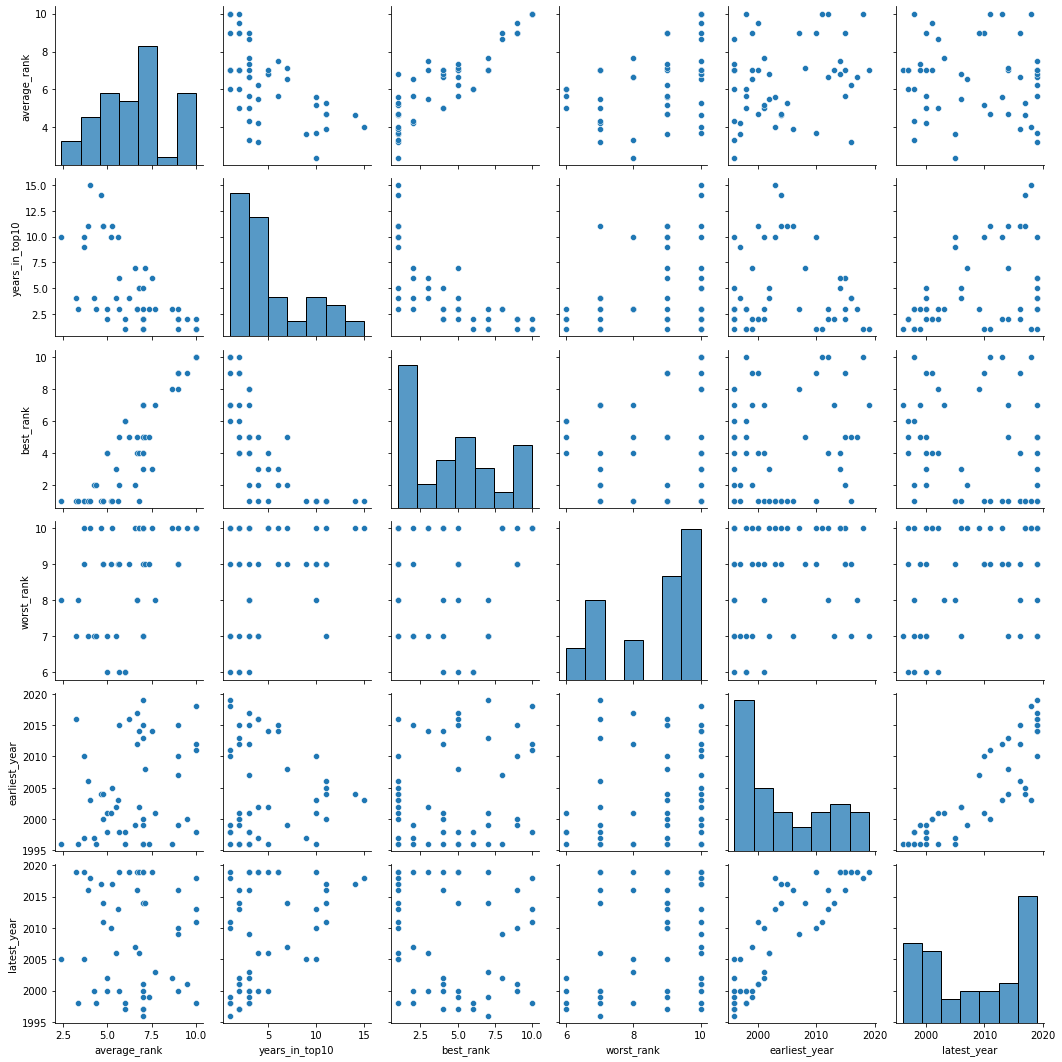

In [4]:
sns.pairplot(df_male)

Figure 1. Plotting histograms and pairwise scatterplots for `male_processed.csv`

Patterns based on pairplot of male data

**Univariate**

* average rank. most people have average rank in mid to high region. few people have low average rank, which makes sense! Hard to be consistently in top few places in the world
* years in top 10. large peak in the small number of years. then it roughly flattens out from there
* best rank. a large number of male players who were in top 10 also had highest rank of 1. this is an indication of how closely matched many of these top players were. also a second peak at 10, which says that amongst those who get into top 10, many of them are on the edge of being in top 10 and not being in the top 10
* worst rank. most people's worst rank is in the higher numbers. makes sense. even for the very best players, there is a time that they were not the best (either on their way up the rankings or in final years of their career when they cannot maintain their high standard)
* earliest year. large peak at earlist years. this highlights limitation of dataset: many of these people who are in this peak actually got into the top 10 in previous years, but dataset only goes back so far
* latest year. similar pattern but reversed. large peak for latest year. many of these players will continue to be in the top 10 in years to come

**multivariate**
* there are strong correlations between average rank, years in top 10 and best rank. this makes sense
* there is strong correlation between earliest year and latest year, this is also expected
* there is little correlation between columns relating to rank and earliest or latest years.

## Question 1. Do any players standout?

Looking at the table of values above, here are the players that standout to me:

* Peter Nicol has an average rank of 2.4 with 10 years worth of ranks. This is more impressive given that one of his 10 ranks is a rank of 8 (his worst rank in the 10 year period); this means the average of the other 9 ranks is (24-8)/9 = 1.8. This very low average rank over a long period is clear illustration of how dominant Peter Nicol was.
* Gregory Gaultier has 15 years in the top 10, closely following by Nick Matthew with 14 years. Commentators often talk about how long Gregory has been an elite player, but I only appreciate the achievement now by comparing this to other elite players - the next highest number of years in the top 10 is 11, so there is a significant difference between Gaultier and Matthew and the rest.

## Question 2. Can we separate the absolute best from the other players?

I was anticipating doing some sort of modelling of the data here, but scanning through the table and using my own domain expertise, there is a simple criteria that does an excellent job of separating the best players from the rest:

* If the player's highest ranking is 1, then we predict they are in this 'absolute best' list of players

This is likely not convincing to people not familiar with the sport, but (I expect) other squash fans would agree with this rule.

It is not perfect though. Using this criteria you would include Lee Beachill in this list of best players. From my own judgement, I would not group Lee Beachill with the others player in this group; his reputation is not as remarkable as the other players. I think the fact that his other stats are not as impressive as the other best players matches my intuition that he should not be grouped with these players.

## Question 3. Are there any other subgroups of players that can be identified?
To answer this, I will do some visualisations with dimension reduction and some clustering

In [5]:
def create_bokeh_plot(data_original, data_dim_reduced, title):
    """
    create an (interactive) bokeh plot
    it will be a scatterplot that visualises the data_dim_reduced, and
    when you hover over points of the plot, data from data_original will be
    shown
    
    Inputs:
        data_original (pd.DataFrame)
            dataframe containing original data
        data_dim_reduced (np array)
            transformed version of original data, after using a 
            dimension reduction technique down to 2 dimensions
        title (string)
            title for the plot
    """
    source = ColumnDataSource(
        data=dict(
            x=data_dim_reduced[:, 0],
            y=data_dim_reduced[:, 1],
            players=data_original.index,
            best_rank=data_original.best_rank,
            years_in_top10=data_original.years_in_top10,
            earliest_year=data_original.earliest_year
        )
    )

    TOOLS="box_zoom,hover,reset"
    p = figure(title=title, tools=TOOLS)
    p.background_fill_color = "white"
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None

    p.scatter(x='x', y='y', source=source)

    hover = p.select(dict(type=HoverTool))
    hover.tooltips = [
        ("Player", "@players"),
        ("Best rank", "@best_rank"),
        ("Years in Top 10", "@years_in_top10"),
        ("Earliest year", "@earliest_year")
    ]
    
    return p


def create_bokeh_plot_clusters(data_original, data_dim_reduced, title, clusters):
    """
    create an (interactive) bokeh plot with clusters encoded by colours.
    it will be a scatterplot that visualises the data_dim_reduced, and
    when you hover over points of the plot, data from data_original will be
    shown
    
    Inputs:
        data_original (pd.DataFrame)
            dataframe containing original data
        data_dim_reduced (np array)
            transformed version of original data, after using a 
            dimension reduction technique down to 2 dimensions
        title (string)
            title for the plot
        clusters (np array)
            array containing list of clusters that each row of data_original
            belongs to
    """
    source = ColumnDataSource(
        data=dict(
            x=data_dim_reduced[:, 0],
            y=data_dim_reduced[:, 1],
            clusters = [f'{i}' for i in clusters],
            players=data_original.index,
            best_rank=data_original.best_rank,
            years_in_top10=data_original.years_in_top10,
            earliest_year=data_original.earliest_year
        )
    )
    
    palette = d3['Category10'][3]
    color_map = CategoricalColorMapper(factors=[f'{i}' for i in range(3)],
                                   palette=palette)

    TOOLS="box_zoom,hover,reset"
    p = figure(title=title, tools=TOOLS)
    p.background_fill_color = "white"
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None

    p.scatter(x='x', y='y',
              color={'field': 'clusters', 'transform': color_map},
              source=source)

    hover = p.select(dict(type=HoverTool))
    hover.tooltips = [
        ("Player", "@players"),
        ("Best rank", "@best_rank"),
        ("Years in Top 10", "@years_in_top10"),
        ("Earliest year", "@earliest_year")
    ]
    
    return p

In [6]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_male)

In [7]:
p = create_bokeh_plot(df_male, data_pca, title="PCA of Male Squash Player Rankings")
show(p)

Figure 2. Scatterplot of 2D pca transformation of `male_processed.csv`. The x-axis is the 1st PCA component and the y-axis is the 2nd PCA component

By manually hovering over the various dots in this sketch, some patterns become relevant:
* the x-axis seems to correlate with the year the players were playing, with small x-values corresponding to earlier playing years and large x-values corresponding to later player years
* the y-axis seemts to correlate most with the number of years in the top 10. matching the observation I made earlier, Greg Gaultier and Nick Matthew stand out in this visual. Peter Nicol is less obvious, but does also occupy an extreme part of the graph, being the top-left-most point
* There roughly seems to be three clusters. The top cluster of players who have been in top 10 many years, the bottom left group of players who played in late 90s and early 2000s, and bottom right players who been in the top 10 in only the past several years

Based on this, I will try doing a k-means clustering with three clusters and re-visualise

In [8]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_male)

In [9]:
p = create_bokeh_plot_clusters(df_male,
                           data_pca,
                           'PCA of Male Squash Player Rankings',
                           kmeans.labels_)
show(p)
save(p, filename = 'pca.html')

/usr/local/Caskroom/miniconda/base/envs/squash_wiki/lib/python3.9/site-packages/bokeh/io/saving.py:126: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/usr/local/Caskroom/miniconda/base/envs/squash_wiki/lib/python3.9/site-packages/bokeh/io/saving.py:139: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'/Users/lovkush/Desktop/Folder/Coding/squash_wiki/pca.html'

Figure 3. Scatterplot of 2D pca transformation of `male_processed.csv`. The x-axis is the 1st PCA component and the y-axis is the 2nd PCA component. The colours correponds to the different clusters as determined by kmeans clustering on the original `male_processed.csv` dataset

We see that the clustering on the original dataset largely corresponds to the visual clustering I carried out while looking at Figure 2. A few noteworth points:
* Peter Nicol and Jonathan Power have been added to the orange cluster of older players as opposed to the green cluster of players with many years in the top 10.
* Peter Barker, the dot between the green and blue cluters, has been considered member of the green cluster as opposed to the blue cluster. Look at the stats and their location in the chart, it is hard to say they are more in one than the other, but really are in between the two

For the sake of comparison, I will see how tSNE and UMAP visualise the data.

In [10]:
# perplexity was varied until useful visualisation was produced. for other perplexities
# there were no patterns at all, just a single blob of points
tsne_model = TSNE(n_components=2, perplexity = 5, random_state = 0)
data_tsne = tsne_model.fit_transform(df_male)

In [11]:
p = create_bokeh_plot_clusters(df_male,
                           data_tsne,
                           'tSNE of Male Squash Player Rankings',
                           kmeans.labels_)
show(p)
save(p, filename = 'tsne.html')

/usr/local/Caskroom/miniconda/base/envs/squash_wiki/lib/python3.9/site-packages/bokeh/io/saving.py:126: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/usr/local/Caskroom/miniconda/base/envs/squash_wiki/lib/python3.9/site-packages/bokeh/io/saving.py:139: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'/Users/lovkush/Desktop/Folder/Coding/squash_wiki/tsne.html'

Figure 4. Scatterplot of 2D tsne transformation of `male_processed.csv`. The x-axis is the 1st tsne component and the y-axis is the 2nd tsne component. The colours correponds to the different clusters as determined by kmeans clustering on the original `male_processed.csv` dataset

The transformation from tSNE again largely agrees with the visual groupings I suggested from Figure 2. Some notable points:

* tSNE really separates out the groups into separate chunks
* tSNE has identified four groups rather than three. There are the five orange dots in between the main orange gruop and the green group, which contain the top players from the late 90s and early 2000s
* in this visualisation, peter barker (the green point in the blue cluster) is very much considered to be part of the blue cluster, rather than lying in between the two

In [16]:
# perplexity was varied until useful visualisation was produced. for other perplexities
# there were no patterns at all, just a single blob of points
umap_model = UMAP()
data_umap = umap_model.fit_transform(df_male)

In [17]:
p = create_bokeh_plot_clusters(df_male,
                           data_umap,
                           'umap of Male Squash Player Rankings',
                           kmeans.labels_)
show(p)
save(p, filename = 'umap.html')

/usr/local/Caskroom/miniconda/base/envs/squash_wiki/lib/python3.9/site-packages/bokeh/io/saving.py:126: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/usr/local/Caskroom/miniconda/base/envs/squash_wiki/lib/python3.9/site-packages/bokeh/io/saving.py:139: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'/Users/lovkush/Desktop/Folder/Coding/squash_wiki/umap.html'

Figure 5. Scatterplot of 2D UMAP transformation of `male_processed.csv`. The x-axis is the 1st UMAP component and the y-axis is the 2nd UMAP component. The colours correponds to the different clusters as determined by kmeans clustering on the original `male_processed.csv` dataset

The transformation from UMAP is consistent with the other dimension reductions. Some things I have noticed here:

* It has grouped things similarly to the other two, but also presented the groups in a coherent way - as you move along the diagonal you are moving along in time. Really feels like going through history as you read the names going from bottom right to top left.
* Similar to tSNE, it has identified 5 orange dots that are inbetween the main orange cluster and the green cluster
* Similar to tSNE, Peter Barker has been placed in closer to the blue clusters than the green